In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [9]:

df = pd.read_excel("player_selection_prediction.xlsx")

# shows first 5 rows
df.head()

,Runs_Last_Season,Wickets_Last_Season,Fitness_Score,Matches_Played,Strike_Rate,Economy_Rate,Age,Speed_kmph,Player_Role,League_Level,Handedness,Country,Selected
0,883,41,6.514098,47,78.883565,7.748975,31,139.288816,Batsman,State,Right,Australia,1
1,617,5,1.356801,58,126.031977,6.910537,24,128.803856,All-Rounder,Local,Left,New Zealand,0
2,92,6,6.378726,14,132.505251,7.453741,26,148.003369,Bowler,International,Left,New Zealand,1
3,675,39,9.575316,4,145.517303,8.233492,32,133.612878,Bowler,State,Right,Pakistan,1
4,246,48,4.781633,44,97.027809,8.265709,20,150.177464,Bowler,National,Left,New Zealand,1


In [10]:
df.shape

(1000, 13)

In [11]:
df.tail()

,Runs_Last_Season,Wickets_Last_Season,Fitness_Score,Matches_Played,Strike_Rate,Economy_Rate,Age,Speed_kmph,Player_Role,League_Level,Handedness,Country,Selected
995,872,4,7.555417,15,196.070111,8.294207,25,152.720950,Batsman,Local,Left,England,1
996,112,40,2.112193,23,104.734404,5.285694,22,143.116041,Batsman,Local,Right,New Zealand,0
997,217,4,6.154389,49,154.642733,3.499556,36,114.859501,Bowler,National,Left,Pakistan,0
998,739,23,1.651860,52,179.176382,10.610359,38,153.857435,Batsman,National,Left,South Africa,0
999,614,18,8.136906,9,150.461909,10.393674,32,144.584692,Batsman,Local,Left,South Africa,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Runs_Last_Season     1000 non-null   int64  
 1   Wickets_Last_Season  1000 non-null   int64  
 2   Fitness_Score        1000 non-null   float64
 3   Matches_Played       1000 non-null   int64  
 4   Strike_Rate          1000 non-null   float64
 5   Economy_Rate         1000 non-null   float64
 6   Age                  1000 non-null   int64  
 7   Speed_kmph           1000 non-null   float64
 8   Player_Role          1000 non-null   object 
 9   League_Level         1000 non-null   object 
 10  Handedness           1000 non-null   object 
 11  Country              1000 non-null   object 
 12  Selected             1000 non-null   int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 101.7+ KB


In [13]:
df.describe()

,Runs_Last_Season,Wickets_Last_Season,Fitness_Score,Matches_Played,Strike_Rate,Economy_Rate,Age,Speed_kmph,Selected
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,592.774000,24.244000,5.403572,29.515000,125.174004,7.504611,27.137000,132.449092,0.478000
std,343.687346,14.684894,2.594772,17.267424,43.767032,2.633985,7.027917,12.794018,0.499766
min,1.000000,0.000000,1.014187,0.000000,50.033130,3.010617,16.000000,110.006604,0.000000
25%,294.750000,11.000000,3.172507,14.000000,87.362929,5.282621,21.000000,121.558404,0.000000
50%,595.000000,24.000000,5.287532,30.000000,126.221857,7.398675,27.000000,132.728038,0.000000
75%,895.000000,38.000000,7.594794,44.000000,164.552676,9.789762,33.000000,142.975400,1.000000
max,1199.000000,49.000000,9.981395,59.000000,199.777305,11.993826,39.000000,154.867971,1.000000


In [14]:
df.isnull().sum()

Runs_Last_Season       0
Wickets_Last_Season    0
Fitness_Score          0
Matches_Played         0
Strike_Rate            0
Economy_Rate           0
Age                    0
Speed_kmph             0
Player_Role            0
League_Level           0
Handedness             0
Country                0
Selected               0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df['Selected'].value_counts()

Selected
0    522
1    478
Name: count, dtype: int64

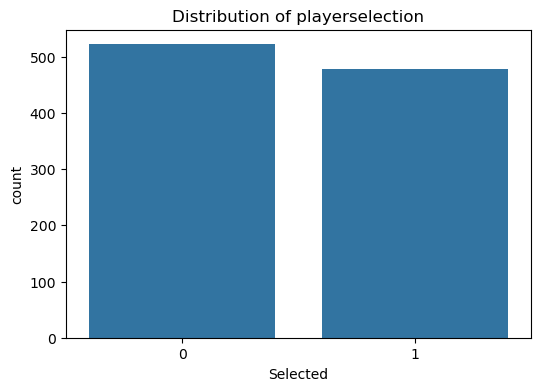

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='Selected', data=df)
plt.title("Distribution of playerselection")
plt.show()

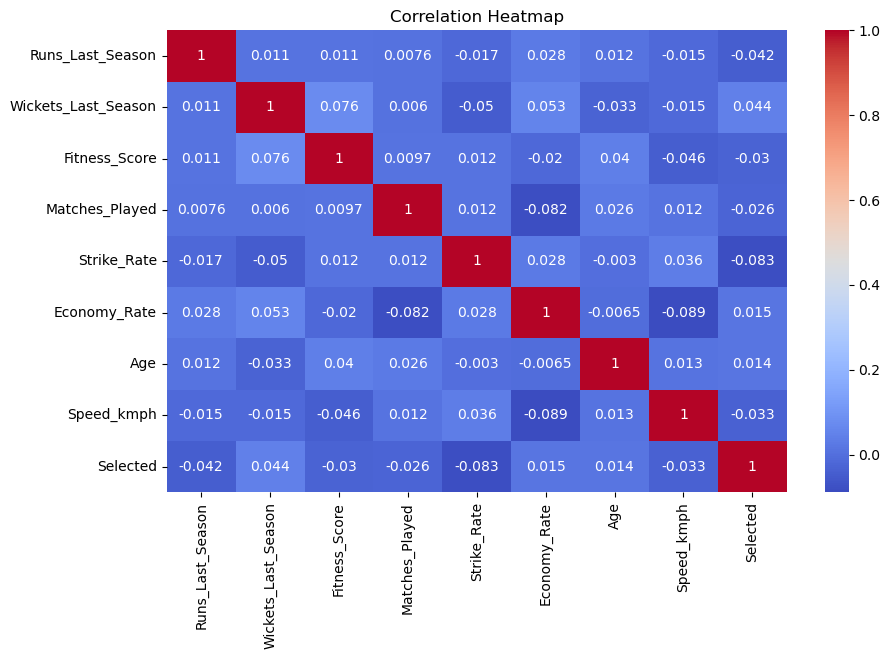

In [20]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [21]:
for col in ['Player_Role', 'League_Level', 'Handedness', 'Country']:
    print("\n", col)
    print(pd.crosstab(df[col], df['Selected'], normalize='index'))


 Player_Role
Selected              0         1
Player_Role                      
All-Rounder    0.501873  0.498127
Batsman        0.558140  0.441860
Bowler         0.484716  0.515284
Wicket-Keeper  0.540650  0.459350

 League_Level
Selected              0         1
League_Level                     
International  0.485597  0.514403
Local          0.544715  0.455285
National       0.479675  0.520325
State          0.573585  0.426415

 Handedness
Selected           0         1
Handedness                    
Left        0.525617  0.474383
Right       0.517970  0.482030

 Country
Selected             0         1
Country                         
Australia     0.520710  0.479290
England       0.496970  0.503030
India         0.530201  0.469799
New Zealand   0.586826  0.413174
Pakistan      0.530387  0.469613
South Africa  0.467456  0.532544


In [22]:
X = df.drop('Selected', axis=1)
y = df['Selected']

In [23]:
X = pd.get_dummies(X, drop_first=True)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [27]:
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.57      0.54       104
           1       0.48      0.43      0.45        96

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200


Confusion Matrix:
 [[59 45]
 [55 41]]


In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))

RF Accuracy: 0.5


In [30]:
importances = rf.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.head(10)

Runs_Last_Season       0.114860
Strike_Rate            0.113253
Economy_Rate           0.111646
Speed_kmph             0.109517
Fitness_Score          0.109407
Wickets_Last_Season    0.098319
Matches_Played         0.098140
Age                    0.081824
Handedness_Right       0.016636
Player_Role_Batsman    0.014635
dtype: float64

In [31]:
import joblib

joblib.dump(rf, "player_selection_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns, "model_features.pkl")

print("Model, scaler, and feature list saved successfully!")


Model, scaler, and feature list saved successfully!


In [32]:
import joblib

model = joblib.load("player_selection_model.pkl")
scaler = joblib.load("scaler.pkl")
model_features = joblib.load("model_features.pkl")

In [33]:
num_cols = [
    "Runs_Last_Season",
    "Wickets_Last_Season",
    "Fitness_Score",
    "Matches_Played",
    "Strike_Rate",
    "Economy_Rate",
    "Age",
    "Speed_kmph"
]

ranges = df[num_cols].agg(["min", "max"])
ranges


,Runs_Last_Season,Wickets_Last_Season,Fitness_Score,Matches_Played,Strike_Rate,Economy_Rate,Age,Speed_kmph
min,1,0,1.014187,0,50.033130,3.010617,16,110.006604
max,1199,49,9.981395,59,199.777305,11.993826,39,154.867971


In [34]:
print("\n📊 Valid Player Input Ranges:\n")

for col in num_cols:
    print(f"{col}: {ranges.loc['min', col]} → {ranges.loc['max', col]}")



📊 Valid Player Input Ranges:

Runs_Last_Season: 1 → 1199
Wickets_Last_Season: 0 → 49
Fitness_Score: 1.014186700742615 → 9.98139486816239
Matches_Played: 0 → 59
Strike_Rate: 50.03312969131229 → 199.777304769917
Economy_Rate: 3.010616613705117 → 11.99382623506683
Age: 16 → 39
Speed_kmph: 110.0066037794523 → 154.8679705011391


In [35]:
def get_input(col, min_val, max_val, dtype=float):
    while True:
        try:
            value = dtype(input(f"{col} ({min_val} to {max_val}): "))
            if min_val <= value <= max_val:
                return value
            else:
                print(f"❌ Enter value between {min_val} and {max_val}")
        except:
            print("❌ Invalid input, try again")


In [36]:
def predict_player_selection():

    print("\n🏏 Enter Player Details\n")

    data = {
        "Runs_Last_Season": get_input("Runs_Last_Season",
            ranges.loc['min',"Runs_Last_Season"],
            ranges.loc['max',"Runs_Last_Season"], float),

        "Wickets_Last_Season": get_input("Wickets_Last_Season",
            ranges.loc['min',"Wickets_Last_Season"],
            ranges.loc['max',"Wickets_Last_Season"], int),

        "Fitness_Score": get_input("Fitness_Score",
            ranges.loc['min',"Fitness_Score"],
            ranges.loc['max',"Fitness_Score"], float),

        "Matches_Played": get_input("Matches_Played",
            ranges.loc['min',"Matches_Played"],
            ranges.loc['max',"Matches_Played"], int),

        "Strike_Rate": get_input("Strike_Rate",
            ranges.loc['min',"Strike_Rate"],
            ranges.loc['max',"Strike_Rate"], float),

        "Economy_Rate": get_input("Economy_Rate",
            ranges.loc['min',"Economy_Rate"],
            ranges.loc['max',"Economy_Rate"], float),

        "Age": get_input("Age",
            ranges.loc['min',"Age"],
            ranges.loc['max',"Age"], int),

        "Speed_kmph": get_input("Speed_kmph",
            ranges.loc['min',"Speed_kmph"],
            ranges.loc['max',"Speed_kmph"], float),

        "Player_Role": input("Player Role (Batsman/Bowler/All-Rounder): "),
        "League_Level": input("League Level (Local/State/National/International): "),
        "Handedness": input("Handedness (Left/Right): "),
        "Country": input("Country: ")
    }

    input_df = pd.DataFrame([data])

    # Encoding
    input_df = pd.get_dummies(input_df)
    input_df = input_df.reindex(columns=model_features, fill_value=0)

    # Scaling
    input_scaled = scaler.transform(input_df)

    # Prediction
    pred = model.predict(input_scaled)[0]
    prob = model.predict_proba(input_scaled)[0][1]

    print("\n📢 Prediction Result:")
    if pred == 1:
        print(f"✅ SELECTED (Confidence: {prob:.2f})")
    else:
        print(f"❌ NOT SELECTED (Confidence: {1 - prob:.2f})")


In [37]:
predict_player_selection()


🏏 Enter Player Details



Runs_Last_Season (1 to 1199):  500
Wickets_Last_Season (0 to 49):  25
Fitness_Score (1.014186700742615 to 9.98139486816239):  5
Matches_Played (0 to 59):  25
Strike_Rate (50.03312969131229 to 199.777304769917):  125
Economy_Rate (3.010616613705117 to 11.99382623506683):  7.50
Age (16 to 39):  25
Speed_kmph (110.0066037794523 to 154.8679705011391):  130
Player Role (Batsman/Bowler/All-Rounder):  All-Rounder
League Level (Local/State/National/International):  International
Handedness (Left/Right):  Right
Country:  India



📢 Prediction Result:
❌ NOT SELECTED (Confidence: 0.51)
